In [1]:
%pwd

'/home/analyst'

In [2]:
%ls

ModelGraph.html  gameofthrones.html          notebooks/
Untitled.ipynb   lib/                        scikit_learn_data/
dlenv/           neural_net_onlyNumpy.ipynb


In [3]:
%cd notebooks/

/home/analyst/notebooks


/home/analyst/dlenv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
%ls 

'#logistic-regression-numpy.ipynb'*   gameofthrones.html
'Classifying non linear data.ipynb'   lib/
 Dockerfile*                          models/
 MLP.ipynb                            neural_net/
 ModelGraph.html                      pure_numpy_clean.ipynb*
'OLS with tf.ipynb'*                  pure_numpy_clean.py*
 active_funcs.ipynb                   readme.md*
 autodiff_reverse_mode.jpeg*          tf_logs/
 data/


In [5]:
!ls -l neural_net/

total 24
-rwxrwxrwx 1 root    root     172 Feb 17 15:15 __init__.py
drwxr-xr-x 1 analyst analyst  512 Feb 18 18:43 __pycache__
-rwxrwxrwx 1 root    root    2940 Feb 18 07:47 activation_funcs.py
-rwxrwxrwx 1 root    root    1186 Feb 18 18:43 architecture.py
-rwxrwxrwx 1 root    root     214 Feb 18 05:07 init_funcs.py
-rwxrwxrwx 1 root    root    1929 Feb 18 07:46 layers.py
-rwxrwxrwx 1 root    root    1079 Feb 18 18:55 loss.py
-rwxrwxrwx 1 root    root     221 Feb 17 14:06 metrics.py
-rwxrwxrwx 1 root    root     993 Feb 18 18:36 utils.py


In [6]:
from neural_net import *
import matplotlib.pyplot as plt
import numpy

# linear data

In [7]:
X = numpy.random.uniform(-10,10,(300,2))
X.shape

(300, 2)

In [8]:
y = (X[:,0] + X[:,1] < 1.5).reshape(-1,1)+0
y.shape

(300, 1)

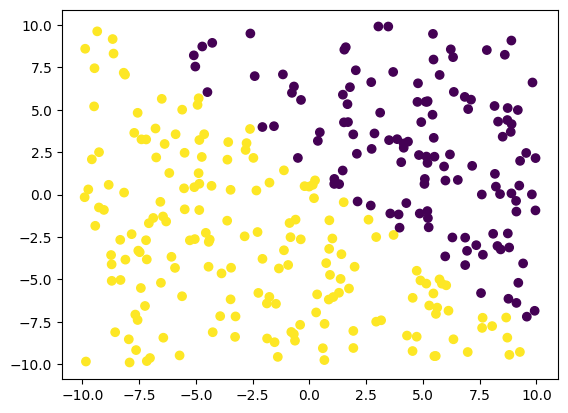

In [9]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Logistic regression

In [10]:
LogisticRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1),
        layers.activation(func=activation_funcs.σ)
        ]
    )

In [11]:
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        p = (p>.5) + 0
        self.y,self.p = y,p

In [12]:
LogisticRegressor.train(X,y,
                        α=.1,
                        n_epochs=100,
                        cost=loss.binaryCrossEntropy,
                        metrics=accuracy)

epoch 0 batch slice(0, 300, None) metrics 0.4166666666666667 cost 0.6931471805599453
epoch 1 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.3598119275799125
epoch 2 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.29755633780249535
epoch 3 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.2656598130738806
epoch 4 batch slice(0, 300, None) metrics 0.92 cost 0.24522929534569457
epoch 5 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.23062470988902906
epoch 6 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.21946752053026605
epoch 7 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.21055361994776717
epoch 8 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.20319814914098117
epoch 9 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.19697849808043713
epoch 10 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.19161761930984567
epoch 11 batch slice(0, 300, None) metrics 0.9233333333333333 cost 0.1

In [13]:
(_,p)=LogisticRegressor.eval()[0]

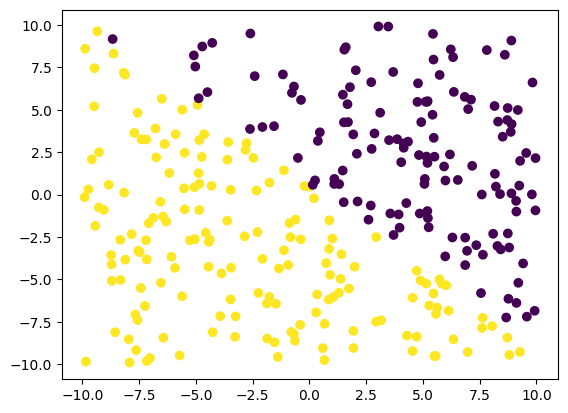

In [14]:
plt.scatter(x=X[:,0],y=X[:,1],c=(p>.5)+0)²

## Softmax

In [15]:
SoftmaxRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1,k=2),
        layers.activation(func=activation_funcs.Softmax)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        p=p.argmax(axis=1)
        y = y.argmax(axis=1)
        self.p,self.y = p,y

SoftmaxRegressor.train(X,utils.onehot(y),
                        α=.1,
                        n_epochs=100,
                        cost=loss.CrossEntropy,
                        metrics=accuracy)

epoch 0 batch slice(0, 300, None) metrics 0.4166666666666667 cost 0.6931471805599453
epoch 1 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6914395662371566
epoch 2 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6897409878954609
epoch 3 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6880513970020556
epoch 4 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6863707451049428
epoch 5 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6846989838368536
epoch 6 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6830360649190979
epoch 7 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6813819401653416
epoch 8 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6797365614853114
epoch 9 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6780998808884245
epoch 10 batch slice(0, 300, None) metrics 0.9166666666666666 cost 0.6764718504873463
epoch 11 batch slice(0, 300, None) metrics 0.9166666666666666 co

## Neural Net

In [16]:
Network0 = architecture.Sequential(
        [
        layers.fullyconnected(n_out=50),
        layers.activation(),
        layers.fullyconnected(n_out=50),
        layers.activation(),
        layers.fullyconnected(n_out=1),
        layers.activation()
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        m,M = p.min(),p.max()
        pnew = ((p-m)/(M-m+1e-8)>.5) + 0
        self.y,self.p = y,pnew

Network0.train(X,y,
              α=.5,
              batch_size=10,
              n_epochs=100,
              cost=loss.binaryCrossEntropy,
                metrics=accuracy)

epoch 0 batch slice(0, 10, None) metrics 0.6 cost 0.6931471805599453
epoch 0 batch slice(10, 20, None) metrics 0.8 cost 0.6597606050147639
epoch 0 batch slice(20, 30, None) metrics 0.5 cost 0.6377824689229256
epoch 0 batch slice(30, 40, None) metrics 0.9 cost 0.7334571897089137
epoch 0 batch slice(40, 50, None) metrics 0.9 cost 0.6902522509296054
epoch 0 batch slice(50, 60, None) metrics 0.6 cost 0.679013106144035
epoch 0 batch slice(60, 70, None) metrics 0.7 cost 0.6533848567699223
epoch 0 batch slice(70, 80, None) metrics 0.9 cost 0.5948772435563091
epoch 0 batch slice(80, 90, None) metrics 0.6 cost 0.6831777481004396
epoch 0 batch slice(90, 100, None) metrics 0.8 cost 0.6354555936458295
epoch 0 batch slice(100, 110, None) metrics 0.7 cost 0.6277249507678009
epoch 0 batch slice(110, 120, None) metrics 0.8 cost 0.6623125405542583
epoch 0 batch slice(120, 130, None) metrics 0.8 cost 0.6607831437154704
epoch 0 batch slice(130, 140, None) metrics 0.6 cost 0.7191674888578519
epoch 0 batch

In [17]:
Network0.steps[0].In = [(id(X),X)]
(_,p)=Network0.eval()[0]

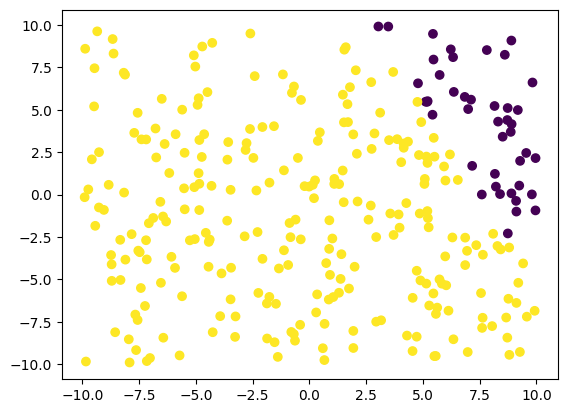

In [18]:

plt.scatter(x=X[:,0],y=X[:,1],c=(p>.5)+0)

# Non Linear data

In [19]:
y = ((((X[:,0]-3)**2 + (X[:,1]+2)**2)**.5)**.5 < 2.1).reshape(-1,1)+0
y.shape

(300, 1)

In [20]:
ix = list(range(len(X)))
numpy.random.shuffle(ix)
X,y = X[ix,:],y[ix,:]

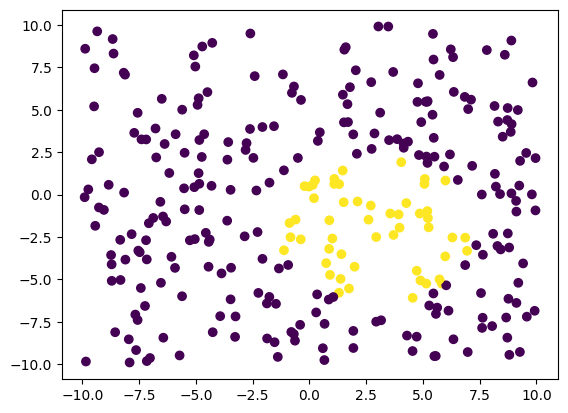

In [21]:
plt.scatter(x=X[:,0],y=X[:,1],c=y)

## Beyond logistic Regression

In [29]:
SoftmaxRegressor = architecture.Sequential(
        [
        layers.fullyconnected(n_out=1,k=2),
        layers.activation(func=activation_funcs.Softmax)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p):
        self.p,self.y = p.argmax(axis=1),y.argmax(axis=1)

SoftmaxRegressor.train(utils.scaler(X),utils.onehot(y),
                        α=.1,
                        n_epochs=1,
                        cost=loss.CrossEntropy,
                        metrics=accuracy)

epoch 0 batch slice(0, 300, None) metrics 0.8466666666666667 cost 0.6931471805599453


In [34]:
utils.onehot(y)

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ Tr

In [35]:
p

array([[0.50938206, 0.49061794],
       [0.5041078 , 0.4958922 ],
       [0.50454087, 0.49545913],
       [0.51210032, 0.48789968],
       [0.51111329, 0.48888671],
       [0.5071276 , 0.4928724 ],
       [0.5071607 , 0.4928393 ],
       [0.50648827, 0.49351173],
       [0.50609808, 0.49390192],
       [0.5083349 , 0.4916651 ],
       [0.51006928, 0.48993072],
       [0.50765123, 0.49234877],
       [0.50734755, 0.49265245],
       [0.50500853, 0.49499147],
       [0.50985252, 0.49014748],
       [0.5107667 , 0.4892333 ],
       [0.50873951, 0.49126049],
       [0.5075688 , 0.4924312 ],
       [0.50932284, 0.49067716],
       [0.50516374, 0.49483626],
       [0.50563022, 0.49436978],
       [0.51138108, 0.48861892],
       [0.51216073, 0.48783927],
       [0.50980775, 0.49019225],
       [0.50814867, 0.49185133],
       [0.51017889, 0.48982111],
       [0.50473591, 0.49526409],
       [0.51005506, 0.48994494],
       [0.50896239, 0.49103761],
       [0.50688502, 0.49311498],
       [0.

In [32]:
(_,p)=SoftmaxRegressor.eval()[0]
loss.CrossEntropy(p,utils.onehot(y)).prime()

array([[-5.09382063e-01, -4.90617937e+07],
       [-5.04107800e-01, -4.95892200e+07],
       [-5.04540865e-01, -4.95459135e+07],
       [-5.12100324e-01, -4.87899676e+07],
       [-5.11113287e-01, -4.88886713e+07],
       [-5.07127603e-01, -4.92872397e+07],
       [-5.07160703e-01, -4.92839297e+07],
       [-5.06488274e+07, -4.93511726e-01],
       [-5.06098080e-01, -4.93901920e+07],
       [-5.08334895e-01, -4.91665105e+07],
       [-5.10069279e-01, -4.89930721e+07],
       [-5.07651226e+07, -4.92348774e-01],
       [-5.07347554e+07, -4.92652446e-01],
       [-5.05008527e-01, -4.94991473e+07],
       [-5.09852525e-01, -4.90147475e+07],
       [-5.10766698e-01, -4.89233302e+07],
       [-5.08739510e-01, -4.91260490e+07],
       [-5.07568802e+07, -4.92431198e-01],
       [-5.09322844e-01, -4.90677156e+07],
       [-5.05163744e-01, -4.94836256e+07],
       [-5.05630221e-01, -4.94369779e+07],
       [-5.11381076e-01, -4.88618924e+07],
       [-5.12160733e-01, -4.87839267e+07],
       [-5.

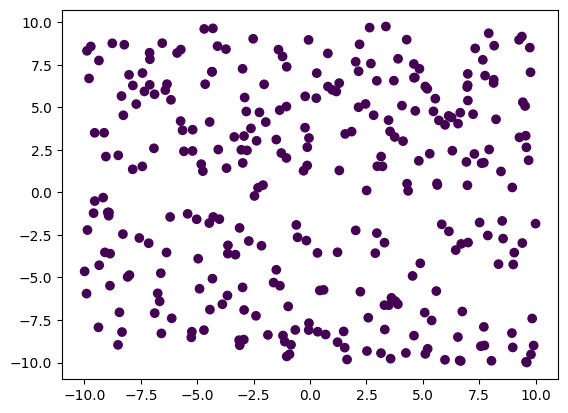

In [53]:
plt.scatter(x=X[:,0],y=X[:,1],c=p.argmax(axis=1))

## Neural Network

In [54]:
Network0 = architecture.Sequential(
        [
        layers.fullyconnected(n_out=300),
        layers.activation(),
        layers.fullyconnected(n_out=100),
        layers.activation(),
        layers.fullyconnected(n_out=1,k=2),
        layers.activation(func=activation_funcs.Softmax)
        ]
    )
class accuracy(metrics.accuracy):
    def __init__(self,y,p): 
        self.p,self.y = p.argmax(axis=1),y.argmax(axis=1)

Network0.train(utils.scaler(X),utils.onehot(y),
              α=.05,
              batch_size=10,
              n_epochs=1000, 
              cost=loss.CrossEntropy,
                metrics=accuracy)

epoch 0 metrics 0.8 cost 0.5761785489958499
epoch 1 metrics 0.8 cost 0.5761785527535942
epoch 2 metrics 0.8 cost 0.5761785527536041
epoch 3 metrics 0.8 cost 0.5761785527535926
epoch 4 metrics 0.8 cost 0.5761785527535686
epoch 5 metrics 0.8 cost 0.5761785527535731


KeyboardInterrupt: 

In [51]:
Network.eval()

[(140119020916240,
  array([[0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 0.5],
         [0.5, 

In [46]:
Network.steps[-2].In[0]